In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* understanding the final data structure
* supported with visual analytics

### John Hopkins Data (GITHUB)

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_raw = pd.read_csv(data_path)

In [3]:
df_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729


In [4]:
date_idx = df_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({'date':date_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
df_raw['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
266               Vietnam
267    West Bank and Gaza
268                 Yemen
269                Zambia
270              Zimbabwe
Name: Country/Region, Length: 271, dtype: object

In [7]:
df_raw[df_raw['Country/Region']=='US'].iloc[:, 4::].sum(axis = 0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
12/4/20    14367437
12/5/20    14581318
12/6/20    14756982
12/7/20    14949417
12/8/20    15165295
Length: 322, dtype: int64

In [8]:
country_list = ['US',
                'Canada',
                'Brazil',
                'China',
                'Japan',
                'Korea, South',
                'UK',
                'Italy',
                'France',
                'New Zealand'
                ]

In [9]:
for country in country_list:
    df_plot[country] = np.array(df_raw[df_raw['Country/Region'] == country].iloc[:, 4::].sum(axis = 0))

In [10]:
df_plot

,date,US,Canada,Brazil,China,Japan,"Korea, South",UK,Italy,France,New Zealand
0,1/22/20,1,0,0,548,2,1,0,0,0,0
1,1/23/20,1,0,0,643,2,1,0,0,0,0
2,1/24/20,2,0,0,920,2,2,0,0,2,0
3,1/25/20,2,0,0,1406,2,2,0,0,3,0
4,1/26/20,5,1,0,2075,4,3,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...
317,12/4/20,14367437,406189,6533968,93348,158387,36915,0,1688939,2321703,2078
318,12/5/20,14581318,412543,6577177,93467,160870,37546,0,1709991,2334626,2078
319,12/6/20,14756982,418848,6603540,93577,162917,38161,0,1728878,2345648,2079
320,12/7/20,14949417,426572,6623911,93670,164434,38755,0,1742557,2349059,2085


<AxesSubplot:xlabel='date'>

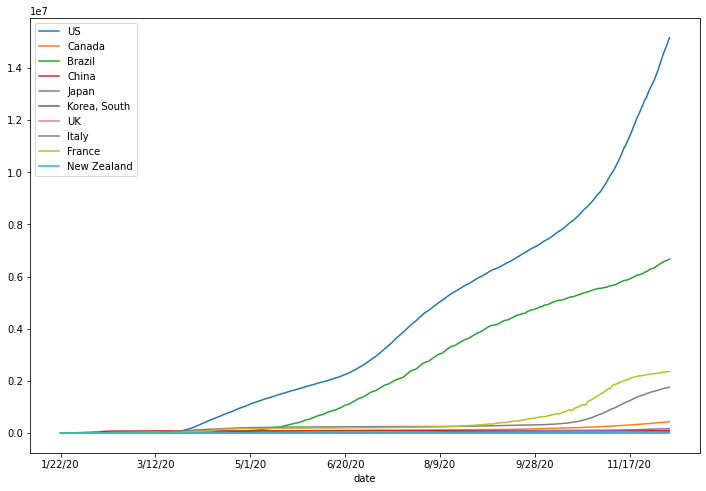

In [11]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [12, 8]
df_plot.set_index('date').plot()

### Date Type Data

In [12]:
type(df_plot.date[0])

str

In [13]:
df_plot.head() # date is in mm/dd/yy format

,date,US,Canada,Brazil,China,Japan,"Korea, South",UK,Italy,France,New Zealand
0,1/22/20,1,0,0,548,2,1,0,0,0,0
1,1/23/20,1,0,0,643,2,1,0,0,0,0
2,1/24/20,2,0,0,920,2,2,0,0,2,0
3,1/25/20,2,0,0,1406,2,2,0,0,3,0
4,1/26/20,5,1,0,2075,4,3,0,0,3,0


In [14]:
datetime.strptime(df_plot.date[0], '%m/%d/%y')

datetime.datetime(2020, 1, 22, 0, 0)

In [15]:
time_idx = [datetime.strptime(item, '%m/%d/%y') for item in df_plot.date] # convert to datetime
time_str = [item.strftime('%Y-%m-%d') for item in time_idx] # convert to ISO norm date

In [16]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df_plot.head()

,date,US,Canada,Brazil,China,Japan,"Korea, South",UK,Italy,France,New Zealand
0,2020-01-22,1,0,0,548,2,1,0,0,0,0
1,2020-01-23,1,0,0,643,2,1,0,0,0,0
2,2020-01-24,2,0,0,920,2,2,0,0,2,0
3,2020-01-25,2,0,0,1406,2,2,0,0,3,0
4,2020-01-26,5,1,0,2075,4,3,0,0,3,0


In [18]:
df_plot.to_csv('../data/processed/COVID_small_flat.csv', sep = ';', index = False)

### Relational Data Model

defining a primary key

In [19]:
df_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729


In [20]:
df_data_base = df_raw.rename(columns = {'Country/Region':'country', 'Province/State':'state'})
df_data_base = df_data_base.drop(['Lat', 'Long'], axis = 1)

df_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716
1,NaN,Albania,0,0,0,0,0,0,0,0,...,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127
4,NaN,Angola,0,0,0,0,0,0,0,0,...,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729


In [21]:
df_relational_model = df_data_base.set_index(['state', 'country']).T
df_relational_model.columns

MultiIndex([(                           nan,         'Afghanistan'),
            (                           nan,             'Albania'),
            (                           nan,             'Algeria'),
            (                           nan,             'Andorra'),
            (                           nan,              'Angola'),
            (                           nan, 'Antigua and Barbuda'),
            (                           nan,           'Argentina'),
            (                           nan,             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                           nan,      'United Kingdom'),
            (                           nan,             'Uruguay'),
            (                           nan,          'Uzbekistan'),
            (                           nan,             'Vanuatu'),
            (     

In [22]:
df_relational_model = df_relational_model.stack(level = [0,1]).reset_index()
df_relational_model = df_relational_model.rename(columns = {'level_0':'date', 0:'confirmed'})

In [23]:
df_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [24]:
df_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [25]:
df_relational_model['date'] = df_relational_model.date.astype('datetime64[ns]')
df_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
df_relational_model.confirmed = df_relational_model.confirmed.astype(int)
df_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed             int64
dtype: object

In [27]:
df_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv', sep = ';')